<a href="https://colab.research.google.com/github/Tj-dev-py/Machine-Learning-Projects/blob/main/Mushrooms_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Collection

In [ ]:
## upgrade sklearn
# %pip install --upgrade scikit-learn 

In [ ]:
# load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from scipy import stats
from scipy.stats import skew, norm, boxcox_normmax
from scipy.special import boxcox1p

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import warnings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [ ]:
# Loading dataset.

data = pd.read_csv('/content/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.shape

(8124, 23)

In [ ]:
train_shape = 8124 - 1000
test_shape = 8124 - train_shape

print(train_shape, test_shape)

7124 1000


In [ ]:
# split into train and test data.
from IPython.display import display

train = data.iloc[:train_shape, :].copy()
test = data.iloc[train_shape:, :].copy()

display(train.head(),
        test.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7124,p,f,y,n,f,s,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,p
7125,p,k,s,e,f,s,f,c,n,b,t,?,k,k,w,p,p,w,o,e,w,v,p
7126,p,k,s,e,f,y,f,c,n,b,t,?,k,k,w,w,p,w,o,e,w,v,p
7127,p,f,y,e,f,f,f,c,n,b,t,?,s,k,p,p,p,w,o,e,w,v,l
7128,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,n,o,p,y,v,l


In [ ]:
display(train.tail(),
        test.tail())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7119,e,k,f,w,f,n,f,w,b,w,e,?,k,k,w,w,p,w,t,p,w,n,g
7120,p,x,s,n,f,s,f,c,n,b,t,?,k,s,p,p,p,w,o,e,w,v,d
7121,p,k,y,n,f,y,f,c,n,b,t,?,s,s,p,w,p,w,o,e,w,v,d
7122,p,x,s,e,f,s,f,c,n,b,t,?,s,s,p,w,p,w,o,e,w,v,d
7123,e,k,s,w,f,n,f,w,b,w,e,?,s,k,w,w,p,w,t,p,w,n,g


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [ ]:
# brief statistical summary
display(train.describe(),
        test.describe())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,p,t,b,s,s,w,w,p,w,o,p,n,v,d
freq,3782,3476,2934,1822,3772,3095,7093,6042,5160,1415,4067,3739,4592,4355,3956,3874,7124,7097,6774,3542,1929,3403,2927


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,5,3,7,2,5,2,2,2,7,2,3,3,3,6,6,1,4,3,3,5,5,4
top,p,k,s,n,f,n,f,c,n,b,t,?,s,s,w,w,p,w,o,e,w,v,l
freq,574,557,584,462,976,433,821,770,548,541,541,930,584,581,508,510,1000,827,714,548,834,637,344


# Data Cleaning

In [ ]:
# seperate target from predictors
y = train['class']
train_features = train.drop('class', axis=1)

# drop predictor from test set
test_features = test.drop('class', axis=1)

In [ ]:
features = pd.concat([train_features, test_features], axis=0)
display(features.head(),
        features.shape)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


(8124, 22)

In [ ]:
features['stalk-root'] = features['stalk-root'].replace('?', np.nan)

In [ ]:
def missing_percentage(df):
    
    """A function for returning missing ratios."""
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
# Checking 'NaN' values.

missing = missing_percentage(features)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

,stalk-root
Total,2480.000000
Percent,30.526834


In [ ]:
# fill in missing values for stalk root
features['stalk-root'] = features['stalk-root'].fillna(
    features['stalk-root'].mode()[0])

# Feature Engineering

In [ ]:
features.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
features['cap'] = features['cap-shape'] + features['cap-surface'] + features['cap-color']
features['cap']

0       xsn
1       xsy
2       bsw
3       xyw
4       xsg
       ... 
8119    ksn
8120    xsn
8121    fsn
8122    kyn
8123    xsn
Name: cap, Length: 8124, dtype: object

In [ ]:
features['gill'] = features['gill-attachment'] + features['gill-spacing'] +\
 features['gill-size'] + features['gill-color']

features['gill']

0       fcnk
1       fcbk
2       fcbn
3       fcnn
4       fwbk
        ... 
8119    acby
8120    acby
8121    acbn
8122    fcnb
8123    acby
Name: gill, Length: 8124, dtype: object

In [ ]:
features['stalk'] = features['stalk-shape'] + features['stalk-root'] +\
 features['stalk-surface-above-ring'] + features['stalk-surface-below-ring'] +\
 features['stalk-color-above-ring'] +features['stalk-color-below-ring']

features['stalk']

0       eessww
1       ecssww
2       ecssww
3       eessww
4       tessww
         ...  
8119    ebssoo
8120    ebssoo
8121    ebssoo
8122    tbskww
8123    ebssoo
Name: stalk, Length: 8124, dtype: object

In [ ]:
features['veil'] = features['veil-type'] + features['veil-color']
features['veil']

0       pw
1       pw
2       pw
3       pw
4       pw
        ..
8119    po
8120    pn
8121    po
8122    pw
8123    po
Name: veil, Length: 8124, dtype: object

In [ ]:
features['ring'] = features['ring-number'] + features['ring-type']
features['ring']

0       op
1       op
2       op
3       op
4       oe
        ..
8119    op
8120    op
8121    op
8122    oe
8123    op
Name: ring, Length: 8124, dtype: object

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# Encode labels in all columns.
features_copy = features.copy()

for col in features_copy.columns:
  features_copy[col] = label_encoder.fit_transform(features_copy[col])

In [ ]:
features_copy.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cap,gill,stalk,veil,ring
0,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5,76,17,28,2,4
1,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1,79,7,26,2,4
2,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3,9,8,26,2,4
3,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5,88,18,28,2,4
4,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1,75,24,57,2,1


In [ ]:
features_encoded = pd.concat([features_copy, pd.get_dummies(features)], axis=1)

display(features_encoded.head(),
        features_encoded.shape)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cap,gill,stalk,veil,ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,...,cap_xfn,cap_xfp,cap_xfw,cap_xfy,cap_xsb,cap_xsc,cap_xse,cap_xsg,cap_xsn,cap_xsp,cap_xsw,cap_xsy,cap_xyb,cap_xyc,cap_xye,cap_xyg,cap_xyn,cap_xyp,cap_xyr,cap_xyu,cap_xyw,cap_xyy,gill_acbn,gill_acbo,gill_acbw,gill_acby,gill_fcbe,gill_fcbg,gill_fcbh,gill_fcbk,gill_fcbn,gill_fcbp,gill_fcbr,gill_fcbu,gill_fcbw,gill_fcby,gill_fcnb,gill_fcng,gill_fcnh,gill_fcnk,gill_fcnn,gill_fcnp,gill_fcnu,gill_fcnw,gill_fwbg,gill_fwbh,gill_fwbk,gill_fwbn,gill_fwbp,gill_fwbw,gill_fwng,gill_fwnn,gill_fwnp,gill_fwnu,gill_fwnw,gill_fwny,stalk_ebffwn,stalk_ebfswn,stalk_ebkkbb,stalk_ebkkbn,stalk_ebkkbp,stalk_ebkknb,stalk_ebkknn,stalk_ebkknp,stalk_ebkkpb,stalk_ebkkpn,stalk_ebkkpp,stalk_ebkkww,stalk_ebksww,stalk_ebkywn,stalk_ebkywy,stalk_ebsfwn,stalk_ebsfww,stalk_ebskww,stalk_ebssee,stalk_ebssew,stalk_ebssoo,stalk_ebsswe,stalk_ebsswn,stalk_ebssww,stalk_ebyynn,stalk_eckycc,stalk_ecssww,stalk_ecyyyy,stalk_eessww,stalk_ersyww,stalk_tbffww,stalk_tbfsww,stalk_tbkkpp,stalk_tbkkpw,stalk_tbkkwp,stalk_tbkkww,stalk_tbkspp,stalk_tbkspw,stalk_tbkswp,stalk_tbksww,stalk_tbsfww,stalk_tbskpp,stalk_tbskpw,stalk_tbskwp,stalk_tbskww,stalk_tbssgg,stalk_tbssgp,stalk_tbssgw,stalk_tbsspg,stalk_tbsspp,stalk_tbsspw,stalk_tbsswg,stalk_tbsswp,stalk_tbssww,stalk_teffww,stalk_tefsww,stalk_tesfww,stalk_tessww,veil_pn,veil_po,veil_pw,veil_py,ring_nn,ring_oe,ring_of,ring_ol,ring_op,ring_te,ring_tp
0,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5,76,17,28,2,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1,79,7,26,2,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,

(8124, 336)

In [ ]:
print(f'Number of missing values: {features_encoded.isna().sum().sum()}')


Number of missing values: 0


In [ ]:
# seperate_train and test set

train_set = features_encoded.iloc[:len(y), :]
test_set = features_encoded.iloc[len(y):, :]

display(train_set.shape, test_set.shape)

(7124, 336)

(1000, 336)

In [ ]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y = pd.Series(y, name='class')
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [ ]:
y.shape

(7124,)

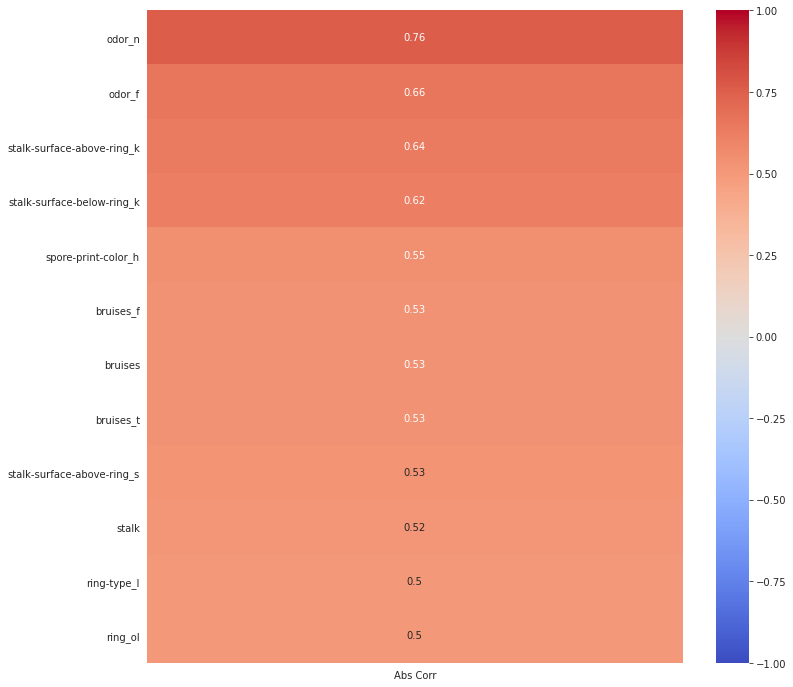

In [ ]:
correlations = train_set.join(y).corrwith(train_set.join(y)['class']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.5], cmap='coolwarm', annot=True, 
            vmin=-1, vmax=1, ax=ax);

# Model Creation and Evaluation

In [ ]:
X = train_set.copy()
X_test = test_set.copy()

In [ ]:
# Loading neccesary packages for modelling.

from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.linear_model import Perceptron, LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.metrics import accuracy_score

In [ ]:
kf = KFold(10, random_state=42, shuffle=True)

In [ ]:
Perceptron = Perceptron()
LogisticRegression = LogisticRegression()
LogisticRegressionCV = LogisticRegressionCV()
MLPClassifier = MLPClassifier()
GaussianNB = GaussianNB()
MultinomialNB = MultinomialNB()
ComplementNB = ComplementNB()
DecisionTreeClassifier = DecisionTreeClassifier()
RandomForestClassifier = RandomForestClassifier()
AdaBoostClassifier = AdaBoostClassifier()
KNeighborsClassifier = KNeighborsClassifier()
SVC = SVC()
QuadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis()

In [ ]:
def model_check(X, y, estimators, cv):
    
    ''' A function for testing multiple estimators.'''
    
    model_table = pd.DataFrame()

    row_index = 0
    for est, label in zip(estimators, labels):

        MLA_name = label
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(est,
                                    X,
                                    y,
                                    cv=cv,
                                    scoring='accuracy',
                                    return_train_score=True,
                                    n_jobs=-1)

        model_table.loc[row_index, 'Train ACC'] = -cv_results[
            'train_score'].mean()
        model_table.loc[row_index, 'Test ACC'] = -cv_results[
            'test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test ACC'],
                            ascending=True,
                            inplace=True)

    return model_table

In [ ]:
estimators = [Perceptron,
LogisticRegression,
LogisticRegressionCV,
MLPClassifier,
GaussianNB,
MultinomialNB,
ComplementNB,
DecisionTreeClassifier,
RandomForestClassifier,
AdaBoostClassifier,
KNeighborsClassifier,
SVC,
QuadraticDiscriminantAnalysis]

labels = ['Perceptron',
'LogisticRegression',
'LogisticRegressionCV',
'MLPClassifier',
'GaussianNB',
'MultinomialNB',
'ComplementNB',
'DecisionTreeClassifier',
'RandomForestClassifier',
'AdaBoostClassifier',
'KNeighborsClassifier',
'SVC',
'QuadraticDiscriminantAnalysis']

In [ ]:
# Executing cross validation.

raw_models = model_check(X, y, estimators, kf)
display(raw_models.style.background_gradient(cmap='summer_r'))

,Model Name,Train ACC,Test ACC,Test Std,Time
2,LogisticRegressionCV,-1.000000,-0.999860,0.000421,23.550845
8,RandomForestClassifier,-1.000000,-0.999860,0.000421,0.680036
9,AdaBoostClassifier,-1.000000,-0.999860,0.000421,1.828179
12,QuadraticDiscriminantAnalysis,-1.000000,-0.999719,0.000561,0.546710
1,LogisticRegression,-0.999797,-0.999719,0.000843,0.635268
3,MLPClassifier,-1.000000,-0.999719,0.000843,5.837435
7,DecisionTreeClassifier,-1.000000,-0.999438,0.000931,0.110019
10,KNeighborsClassifier,-0.997972,-0.997192,0.002512,0.041692
0,Perceptron,-0.985947,-0.986109,0.020844,0.228322
4,GaussianNB,-0.958825,-0.958592,0.006617,0.087136


# Model Testing

In [ ]:
RandomForestClassifier.fit(X, y)

RandomForestClassifier()

In [ ]:
preds = RandomForestClassifier.predict(X_test)

In [ ]:
actual_label = pd.Series(label_encoder.fit_transform(test['class']), name='test_label')
actual_label.head()

0    1
1    1
2    1
3    1
4    0
Name: test_label, dtype: int64

In [ ]:
accuracy_score(preds, actual_label)

1.0

# Results

RandomForestClassifier scored 100% accuracy on the test set.